#### Importing Necessary Libraries

In [141]:
import pandas as pd

import os

import matplotlib.pyplot as plt

from matplotlib.pyplot import figure 

import calendar

from itertools import combinations

from collections import Counter

#### Merging 12 Months of Sales Data into a Single CSV File

In [9]:
# OS Library is used to specify the folder path #

# You can also use os.path.abspath('') if you prefer to use the folder path of Jupyter Notebook instead of local path #

# Donot Use append() as it might be deleted from Pandas Library in future updates #

# Instead Use concat() #


file_path = "/Users/siddhesh/Desktop/Sales_Data"  # Folder path stored in a variable #

file_list = [file for file in os.listdir("/Users/siddhesh/Desktop/Sales_Data")] # Each file from the provided directory #
                                                                                # will be stored in this variable # 

file_list

new_df = pd.DataFrame()

for file in file_list :
    
    temp_df = pd.read_csv("/Users/siddhesh/Desktop/Sales_Data/"+file)# All files will be loaded into this variable #
    
    new_df = pd.concat([new_df,temp_df])# Merging the contents of above variable to new_df which is a DataFrame #
    
new_df.to_csv("/Users/siddhesh/Desktop/Sales_Data/Sales_2019.csv",index = False)# Converting our DataFrame to csv file #

#### Reading Newly Created File in a New Data Frame

In [3]:
all_data = pd.read_csv(r"/Users/siddhesh/Desktop/Sales_Data/Sales_2019.csv")

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


#### Cleaning the Data

1 : Checking for NaN

In [4]:
nan_df = all_data[all_data.isna().any(axis = 1)] # isna() checks for NaN values & any() returns True if condition is satisfied # 

nan_df

all_data = all_data.dropna(how = 'all') # dropna() is used to Drop Rows with NaN #
# 'how' attribute set to 'any' if any value in a Row is NaN it will Drop it & if set to 'all' it will Drop Rows with all NaN #

all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

2 : Finding 'Or' & Deleting it

In [5]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or'] # For Finding Rows with 'Or' #

temp_df

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or'] # Dropping Rows with 'Or' #

all_data['Order Date'].str.contains('Or').any() # For checking if we have successfully deleted 'Or' from DataFrame #

False

3 : Converting Columns to Correct Data Type

In [6]:
# We can also use astype() to change the Data Type of the Columns #
# But astype() requires us to specify the Data Type which it should be converted to #
# to_numeric() doesnt require us to specify the Data Type it chooses it based to the Data present in the Column #

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # Converted to int #

all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # Converted to float #

4 : Converting Month Number to Month Name

In [19]:
# apply() allows us to apply functions defined by us on our. Data Frame #

# month_abbr is a method in Calendar library that will give us the month name for the month number #

all_data['Month'] = all_data['Month'].apply(lambda x : calendar.month_abbr[x])

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",Dec,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",Dec,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",Dec,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",Dec,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",Dec,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",Jun,2.99,Boston
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",Jun,149.99,New York City
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",Jun,11.95,San Francisco
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",Jun,11.95,San Francisco


#### Augmenting the Data with Additional Columns

1 : Adding Month Column

In [15]:
all_data['Month'] = all_data['Order Date'].str[0:2]

all_data['Month'] = pd.to_numeric(all_data['Month'])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95


2 : Adding Total Sales Column

In [8]:
all_data['Total Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95


3 : Adding City Column 

In [36]:
# We can also accomplish the task performed below by creating defining our own function #

# def get_city(address) : #

#     return address.split(',')[1] # 

# In the above function we want to split the text passed as parameter by ',' and then get the text at Index 1 #

# all_data['City'] = all_data['Purchase Address'].apply(lambda x : get_city(x)) #

def get_state (address) :
    return address.split(',')[2].split(' ')[1] # We select the 1st index after splitting on white space #

     # because if we select 0th index we will get Empty Space as we are alreading Splitting on ',' #
    
     # there would be Empty Space before state abbreviation #

#all_data.drop(['State'], axis = 1, inplace = True)

all_data['City'] = all_data['Purchase Address'].apply(lambda x : x.split(',')[1] + ' ' + get_state(x))

# Another way of writing the above line of code would be using f string #

# all_data['City'] = all_data['Purchase Address'].apply(lambda x : f"{get_city(x)} ({get_state(x)})")

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",Dec,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",Dec,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",Dec,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",Dec,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",Dec,11.95,Atlanta GA
...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",Jun,2.99,Boston MA
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",Jun,149.99,New York City NY
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",Jun,11.95,San Francisco CA
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",Jun,11.95,San Francisco CA


4 : Adding Time Column

In [115]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

#all_data.drop(['Time'],axis = 1, inplace = True)

all_data['Hour'] = all_data['Order Date'].dt.hour

all_data['Minute'] = all_data['Order Date'].dt.minute

all_data['Count'] = 1

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",Dec,1700.00,New York City NY,0,1,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",Dec,600.00,New York City NY,7,3,1
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",Dec,11.95,New York City NY,18,21,1
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",Dec,149.99,San Francisco CA,15,13,1
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",Dec,11.95,Atlanta GA,12,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",Jun,2.99,Boston MA,19,2,1
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",Jun,149.99,New York City NY,19,29,1
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",Jun,11.95,San Francisco CA,18,57,1
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",Jun,11.95,San Francisco CA,18,35,1


#### Question No. 1 : What was the best month for sales ? How much was earned that month ?

In [108]:
month_grp = all_data.groupby(['Month']).sum().sort_values(['Total Sales'],ascending = True)

month_grp

,Quantity Ordered,Price Each,Total Sales
Month,,,
Jan,10903,1811768.38,1822256.73
Sep,13109,2084992.09,2097560.13
Feb,13449,2188884.72,2202022.42
Aug,13448,2230345.42,2244467.88
Jun,15253,2562025.61,2577802.26
Jul,16072,2632539.56,2647775.76
Mar,17005,2791207.83,2807100.38
May,18667,3135125.13,3152606.75
Nov,19798,3180600.68,3199603.20


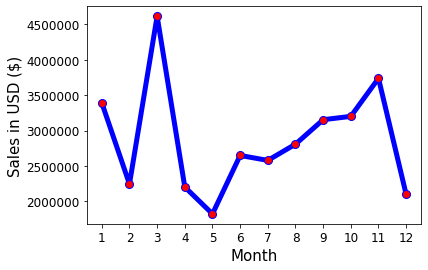

In [107]:
month = range(1,13)

sales = all_data.groupby(['Month']).sum()['Total Sales']

plt.plot(month,sales, color = 'blue', linewidth = 5, marker = 'o', ms = 8, mfc = 'red')

plt.ticklabel_format(style = 'plain') # For disabling scientific notation on Y-axis #
                                      # 'plt.ticklabel_format(useOffset = False', For disabling scientific notation on X-axis #
plt.xticks(month,size = 12)

plt.yticks(size = 12)

plt.xlabel('Month',size = 15)

plt.ylabel('Sales in USD ($)',size = 15)

plt.show()

####  Question No. 2 : What city has the highest number of sales ?

In [37]:
city_grp = all_data.groupby(['City']).sum().sort_values(['Total Sales'],ascending = True)

city_grp



,Quantity Ordered,Price Each,Total Sales
City,,,
Portland ME,2750,447189.25,449758.27
Austin TX,11153,1809873.61,1819581.75
Portland OR,11303,1860558.22,1870732.34
Seattle WA,16553,2733296.01,2747755.48
Dallas TX,16730,2752627.82,2767975.40
Atlanta GA,16602,2779908.20,2795498.58
Boston MA,22528,3637409.77,3661642.01
New York City NY,27932,4635370.83,4664317.43
Los Angeles CA,33289,5421435.23,5452570.80


Text(0, 0.5, 'Sales in USD ($)')

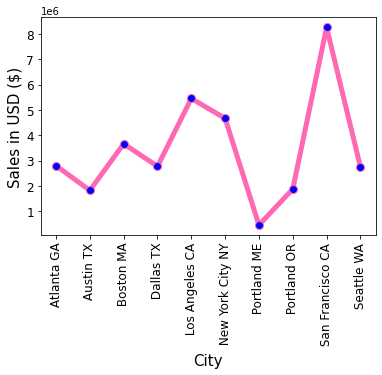

In [106]:
cities = [city for city, df in all_data.groupby(['City'])]

sales = all_data.groupby(['City']).sum()['Total Sales']

plt.plot(cities,sales, color = 'hotpink', linewidth = 5, marker = 'o', ms = 8, mfc = 'blue')

plt.xticks(cities,rotation = 'vertical',size = 12)

plt.yticks(size = 12)

plt.xlabel('City',size = 15)

plt.ylabel('Sales in USD ($)',size = 15)

#### Question No. 3 : What time should we display advertisements to maximize likelihood of customer's buying product ?

1 : Sorted by Total Sales

In [116]:
time_grp = all_data.groupby(['Hour']).sum().sort_values(['Total Sales'])

time_grp

,Quantity Ordered,Price Each,Total Sales,Minute,Count
Hour,,,,,
3,928,144726.42,145757.89,23044,831
4,937,162058.18,162661.01,26876,854
5,1493,229621.21,230679.82,42877,1321
2,1398,233833.64,234851.44,32508,1243
6,2810,445000.11,448113.00,80343,2482
1,2619,458490.00,460866.88,61807,2350
0,4428,709296.70,713721.27,103596,3910
7,4556,740568.11,744854.12,127447,4011
23,7065,1172625.87,1179304.44,173159,6275


2 : Sorted by Hour

In [126]:
time_grp_2 = all_data.groupby(['Hour']).sum().sort_values(['Hour'])

time_grp_2

,Quantity Ordered,Price Each,Total Sales,Minute,Count
Hour,,,,,
0,4428,709296.70,713721.27,103596,3910
1,2619,458490.00,460866.88,61807,2350
2,1398,233833.64,234851.44,32508,1243
3,928,144726.42,145757.89,23044,831
4,937,162058.18,162661.01,26876,854
5,1493,229621.21,230679.82,42877,1321
6,2810,445000.11,448113.00,80343,2482
7,4556,740568.11,744854.12,127447,4011
8,7002,1185970.62,1192348.97,198135,6256


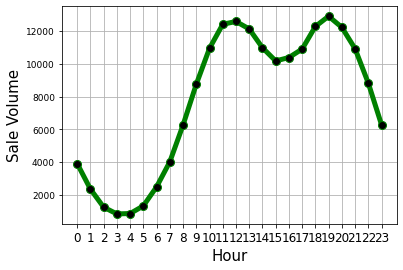

In [177]:
times = [pair for pair, df in all_data.groupby(['Hour'])]

sales = all_data.groupby(['Hour']).count()['Count']

plt.plot(times,sales,color = 'green', linewidth = 5, marker = 'o', ms = 8, mfc = 'black')

plt.xticks(times,size = 12)

plt.yticks(size = 9)

plt.xlabel('Hour',size = 15)

plt.ylabel('Sale Volume',size = 15)

plt.grid()

plt.show()

# Recommended Time for Airing Advertisements slightly Before 11:00 AM & 19:00 PM #  

#### Question No. 4 : What products are most often sold together ?

In [142]:
# duplicated has attribute 'keep' which has 3 states 'first' -> True except first occurance #
#  'last' -> True except last occurance  & 'false' -> True for all occurance #                                 

df = all_data[all_data['Order ID'].duplicated(keep = False)] 

df

# We are grouping by 'Order ID' and selecting the data in 'Product' column #
# Then we use transform() which is very similar to apply() biggest difference between both being that apply() can also be used for aggregate functions #
# We Join all the 'Products' into one single row based on the 'Order ID' #

df['Grouped Orders'] = df.groupby(['Order ID'])['Product'].transform(lambda x : ','.join(x))

# The output of the above line is desirable, but there is an issue wherein the same Row which has Joined in above statement is Duplicated #
# So based on the 'Order ID' & 'Grouped Orders' we drop the duplicate rows #

df = df[['Order ID','Grouped Orders']].drop_duplicates()

df.head()

/var/folders/92/fbs22vpd4736wnzwkx3n1qnm0000gn/T/ipykernel_22325/1592733102.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped Orders'] = df.groupby(['Order ID'])['Product'].transform(lambda x : ','.join(x))


,Order ID,Grouped Orders
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [148]:
# We use the ittertools & collection libraries in this section #
# First we call the Counter() in an variable #
# We use a for loop to itterrate over the rows that we can see in the above output #
# We split each row that our first for loop itterrates on based on ',' which will give us a Sublist #
# We need to update the counter, and we would like combinations of 2. Hence (row_list,2). #
# If we want combinations of 3, it would be (row_list,3), basically we can get any number of combinations #
# This gives us output in Dictionary format #
# Wherein the key -> combination & value -> count of times this combination is repeated #
# In our second for loop we display the most common combinations for that we use most_common from count #
# In this case I have displayed 5 most common combinations # 


count = Counter()

for row in df['Grouped Orders'] :
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
#print(count)
    
for key,value in count.most_common(5) :
    print(key,value)
    


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361


#### Question No. 5 : What product sold the most ? Why do you think it sold the most ?

In [150]:
product_grp = all_data.groupby(['Product']).sum().sort_values(['Quantity Ordered'])

product_grp

,Quantity Ordered,Price Each,Total Sales,Hour,Minute,Count
Product,,,,,,
LG Dryer,646,387600.00,387600.00,9326,19043,646
LG Washing Machine,666,399600.00,399600.00,9785,19462,666
Vareebadd Phone,2068,826000.00,827200.00,29472,61835,2065
20in Monitor,4129,451068.99,454148.71,58764,122252,4101
ThinkPad Laptop,4130,4127958.72,4129958.70,59746,121508,4128
Macbook Pro Laptop,4728,8030800.00,8037600.00,68261,137574,4724
Flatscreen TV,4819,1440000.00,1445700.00,68815,142789,4800
Google Phone,5532,3315000.00,3319200.00,79479,162773,5525
34in Ultrawide Monitor,6199,2348718.19,2355558.01,89076,183480,6181


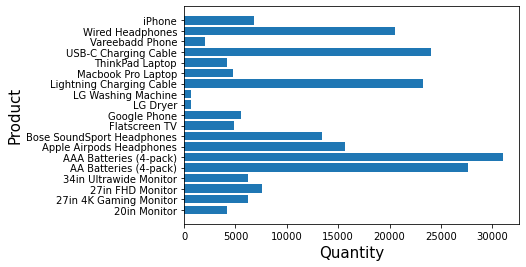

In [160]:
quantity_ordered = all_data.groupby(['Product']).sum()['Quantity Ordered']

prdct = [prod for prod, product_grp in all_data.groupby(['Product'])]

plt.barh(prdct,quantity_ordered)

plt.xticks(size = 10)

plt.yticks(size = 10)

plt.xlabel('Quantity',size = 15)

plt.ylabel('Product',size = 15)

plt.show()

/var/folders/92/fbs22vpd4736wnzwkx3n1qnm0000gn/T/ipykernel_22325/2463096708.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(prdct, rotation='vertical', size=10)
/var/folders/92/fbs22vpd4736wnzwkx3n1qnm0000gn/T/ipykernel_22325/2463096708.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


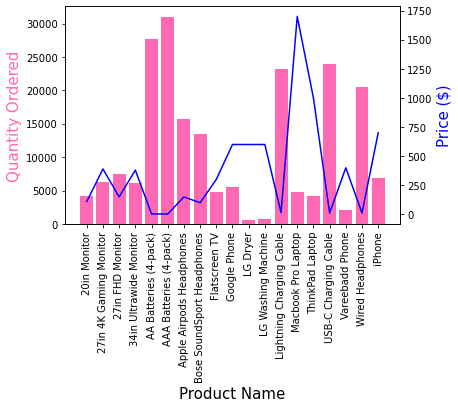

In [176]:
quantity_ordered = all_data.groupby(['Product']).sum()['Quantity Ordered']

prdct = [prod for prod, product_grp in all_data.groupby(['Product'])]

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(prdct, quantity_ordered, color = 'hotpink')
ax2.plot(prdct, prices, color = 'b')

ax1.set_xlabel('Product Name', size = 15)
ax1.set_ylabel('Quantity Ordered', color = 'hotpink', size = 15)
ax2.set_ylabel('Price ($)', color='b', size = 15)
ax1.set_xticklabels(prdct, rotation='vertical', size=10)

fig.show()